# Problem:
California is a big state of America. The population of California is about 39.56 million (2018). 
California is divided into 58 counties. The investor for a given venue (for example restaurant, hotel) want to know in which counties he/ she should invest. 
One feasible solution is clustering of counties base on some their characteristics such as population, median of income, median of rent
Also, Number of given venues have already existed in the county. The information of clusters could help the investor to make decision.
Therefore, in this capstone project, we will collect data of county characteristics. Then, we will cluster the counties of California 


# Data
At the beginning, we collect data about population, Income, house price and using Foursquare to get information about venues
of each county. The data sources as below
1.	Population : https://www.california-demographics.com/counties_by_population
2.	Income : https://en.wikipedia.org/wiki/List_of_California_locations_by_income
3.	House Price : https://www.zillow.com/research/data/
4.	Foursquare API


# Load Population and Income data from Wikipedia to Dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
%matplotlib inline

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_California_locations_by_income'
dfs = pd.read_html(url)
dfs[1].head()

,County,Population[1],Populationdensity[1][2][note 1],Per capita income[3],Median household income[6],Median family income[5]
0,Alameda,1559308,2109.8,"$36,439","$73,775","$90,822"
1,Alpine,1202,1.6,"$24,375","$61,343","$71,932"
2,Amador,37159,62.5,"$27,373","$52,964","$68,765"
3,Butte,221578,135.4,"$24,430","$43,165","$56,934"
4,Calaveras,44921,44.0,"$29,296","$54,936","$67,100"


In [3]:
df_income = dfs[1]

In [4]:
df_income.head()

,County,Population[1],Populationdensity[1][2][note 1],Per capita income[3],Median household income[6],Median family income[5]
0,Alameda,1559308,2109.8,"$36,439","$73,775","$90,822"
1,Alpine,1202,1.6,"$24,375","$61,343","$71,932"
2,Amador,37159,62.5,"$27,373","$52,964","$68,765"
3,Butte,221578,135.4,"$24,430","$43,165","$56,934"
4,Calaveras,44921,44.0,"$29,296","$54,936","$67,100"


# Column rename

In [5]:
df_income.columns =['County','Population','Density','Per_capita_income','Household income','Family income']

In [6]:
df_income.head()

,County,Population,Density,Per_capita_income,Household income,Family income
0,Alameda,1559308,2109.8,"$36,439","$73,775","$90,822"
1,Alpine,1202,1.6,"$24,375","$61,343","$71,932"
2,Amador,37159,62.5,"$27,373","$52,964","$68,765"
3,Butte,221578,135.4,"$24,430","$43,165","$56,934"
4,Calaveras,44921,44.0,"$29,296","$54,936","$67,100"


In [7]:
df_income.shape

(58, 6)

# Convert column data type

In [8]:
df_income['Population'] = df_income['Population'].astype(int)

In [9]:
df_income[['Per_capita_income']] = df_income[['Per_capita_income']].replace('[\$,]','',regex=True).astype(float)

In [10]:
df_income[['Household income']] = df_income[['Household income']].replace('[\$,]','',regex=True).astype(float)

In [11]:
df_income[['Family income']] = df_income[['Family income']].replace('[\$,]','',regex=True).astype(float)

In [12]:
df_income.head()

,County,Population,Density,Per_capita_income,Household income,Family income
0,Alameda,1559308,2109.8,36439.0,73775.0,90822.0
1,Alpine,1202,1.6,24375.0,61343.0,71932.0
2,Amador,37159,62.5,27373.0,52964.0,68765.0
3,Butte,221578,135.4,24430.0,43165.0,56934.0
4,Calaveras,44921,44.0,29296.0,54936.0,67100.0


In [13]:
df_income.to_csv('Population_Income.csv')

# Load House Price from CVS File (Zillow)

In [14]:
df_house_price = pd.read_csv("County_Zhvi_AllHomes.csv")

In [15]:
df_house_price.head()

,RegionID,RegionName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,SizeRank,1996-04,1996-05,1996-06,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
0,3101,Los Angeles County,CA,Los Angeles-Long Beach-Anaheim,6,37,1,176818.0,176955.0,177134.0,...,625786,627162,627902,629576,632000,635385,638392,643078,648206,656790
1,139,Cook County,IL,Chicago-Naperville-Elgin,17,31,2,148775.0,148353.0,148412.0,...,246290,246354,246654,246680,246455,246124,245771,245439,245238,245151
2,1090,Harris County,TX,Houston-The Woodlands-Sugar Land,48,201,3,101060.0,101208.0,101305.0,...,197520,197991,198633,199173,199499,200020,200439,200878,200888,201171
3,2402,Maricopa County,AZ,Phoenix-Mesa-Scottsdale,4,13,4,118611.0,119312.0,119944.0,...,282783,283993,285447,287281,288866,290643,292529,294716,296854,298760
4,2841,San Diego County,CA,San Diego-Carlsbad,6,73,5,180776.0,180589.0,180435.0,...,593523,595218,596989,598589,600515,602130,605256,609134,614512,619887


In [16]:
df_house_price = df_house_price[df_house_price['State']=='CA']

In [17]:
df_house_price.shape

(58, 294)

In [18]:
df_house_price = df_house_price[['RegionName','2020-02']]

In [19]:
df_house_price.columns =['County','HousePrice']

In [20]:
df_house_price.head()

,County,HousePrice
0,Los Angeles County,656790
4,San Diego County,619887
5,Orange County,753361
10,Riverside County,400012
11,San Bernardino County,365759


In [21]:
df_house_price['County']=df_house_price['County'].replace(' County',"",regex=True)

In [22]:
df_house_price.head()

,County,HousePrice
0,Los Angeles,656790
4,San Diego,619887
5,Orange,753361
10,Riverside,400012
11,San Bernardino,365759


In [23]:
df_house_price.shape

(58, 2)

# Merge two dataframe

In [24]:
df = pd.merge(df_income,df_house_price,on='County')

In [25]:
df.head()

,County,Population,Density,Per_capita_income,Household income,Family income,HousePrice
0,Alameda,1559308,2109.8,36439.0,73775.0,90822.0,880231
1,Alpine,1202,1.6,24375.0,61343.0,71932.0,424684
2,Amador,37159,62.5,27373.0,52964.0,68765.0,312764
3,Butte,221578,135.4,24430.0,43165.0,56934.0,327236
4,Calaveras,44921,44.0,29296.0,54936.0,67100.0,330958


In [26]:
df.shape

(58, 7)

# Analyze features

In [27]:
df.describe()

,Population,Density,Per_capita_income,Household income,Family income,HousePrice
count,5.800000e+01,58.000000,58.000000,58.000000,58.000000,5.800000e+01
mean,6.563262e+05,680.206897,27604.344828,56034.362069,66744.344828,4.699471e+05
std,1.443529e+06,2381.703846,8198.398555,14428.471908,17164.865156,2.918424e+05
min,1.202000e+03,1.600000,16409.000000,35997.000000,45296.000000,1.307210e+05
25%,4.727750e+04,25.725000,21754.250000,44717.250000,52788.750000,2.798242e+05
50%,1.799925e+05,105.900000,26190.000000,53302.000000,62945.000000,3.669245e+05
75%,6.564860e+05,341.000000,30913.750000,63946.750000,75677.250000,6.177612e+05
max,9.974203e+06,17680.100000,58004.000000,93854.000000,120030.000000,1.436140e+06


In [28]:
corr = df.corr()
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Population,Density,Per_capita_income,Household income,Family income,HousePrice
Population,1.000000,0.214050,0.129885,0.213370,0.136799,0.259032
Density,0.214050,1.000000,0.473253,0.355580,0.338975,0.576835
Per_capita_income,0.129885,0.473253,1.000000,0.871630,0.935717,0.891513
Household income,0.213370,0.355580,0.871630,1.000000,0.962003,0.882805
Family income,0.136799,0.338975,0.935717,0.962003,1.000000,0.874614
HousePrice,0.259032,0.576835,0.891513,0.882805,0.874614,1.000000


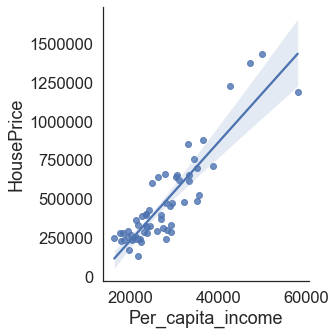

In [29]:
sn.set(font_scale=1.5,style="white")
sn.lmplot(x="Per_capita_income",y="HousePrice",data=df)
plt.show()

# Visualize Counties of California

In [30]:
from geopy.geocoders import Nominatim
import folium

In [31]:
df.head()

,County,Population,Density,Per_capita_income,Household income,Family income,HousePrice
0,Alameda,1559308,2109.8,36439.0,73775.0,90822.0,880231
1,Alpine,1202,1.6,24375.0,61343.0,71932.0,424684
2,Amador,37159,62.5,27373.0,52964.0,68765.0,312764
3,Butte,221578,135.4,24430.0,43165.0,56934.0,327236
4,Calaveras,44921,44.0,29296.0,54936.0,67100.0,330958


In [32]:
Counties = pd.Series(df['County'])

In [33]:
# define the dataframe columns
column_names = ['County', 'Latitude', 'Longitude'] 

# instantiate the dataframe
df_geo = pd.DataFrame(columns=column_names)

In [35]:
geolocator = Nominatim(user_agent="ca_explorer")
for data in Counties:
    location = geolocator.geocode(data)
    latitude = location.latitude
    longitude = location.longitude
    df_geo = df_geo.append({ 'County': data,
                            'Latitude': latitude,
                            'Longitude': longitude}, ignore_index=True)

In [36]:
df_geo.head()

,County,Latitude,Longitude
0,Alameda,37.609029,-121.899142
1,Alpine,38.589393,-119.834501
2,Amador,38.449089,-120.591102
3,Butte,39.651927,-121.585844
4,Calaveras,38.255818,-120.498149


In [37]:
df_geo.shape

(58, 3)

In [43]:
df_final = df.merge(df_geo,on='County')

In [44]:
df_final.head()

,County,Population,Density,Per_capita_income,Household income,Family income,HousePrice,Latitude,Longitude
0,Alameda,1559308,2109.8,36439.0,73775.0,90822.0,880231,37.609029,-121.899142
1,Alpine,1202,1.6,24375.0,61343.0,71932.0,424684,38.589393,-119.834501
2,Amador,37159,62.5,27373.0,52964.0,68765.0,312764,38.449089,-120.591102
3,Butte,221578,135.4,24430.0,43165.0,56934.0,327236,39.651927,-121.585844
4,Calaveras,44921,44.0,29296.0,54936.0,67100.0,330958,38.255818,-120.498149


In [47]:
address = 'Los Angeles, CA'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of California are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of California are 34.0536909, -118.2427666.


In [48]:
# create map of New York using latitude and longitude values
map_ca = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, county in zip(df_final['Latitude'], df_final['Longitude'],df_final['County']):
    label = '{}'.format(county)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ca)  
    
map_ca